# Statistik

## Motivation

Im Laufe der Kapitel haben wir bereits einige Datensätze betrachtet. In [Kapitel 3](kapitel_03] haben wir zum Beispiel die Verteilung von Daten mit Histogrammen visualisiert. Hier sind die Histogramme von zwei weiteren Datensätzen. 

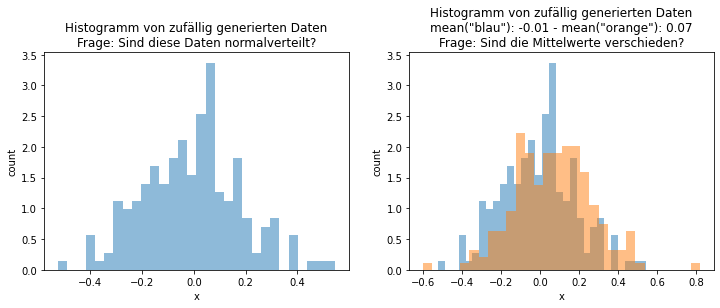

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# generate data
np.random.seed(42) 
mu, sigma = 0, 0.2 # mean and standard deviation
s1 = np.random.normal(mu, sigma, 200)
s2 = np.random.normal(mu+0.05, sigma, 200)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(s1, 30, density=True, alpha=0.5)
axes[0].set_title("Histogramm von zufällig generierten Daten\nFrage: Sind diese Daten normalverteilt?")
axes[0].set_xlabel("x")
axes[0].set_ylabel("count")

axes[1].hist(s1, 30, density=True, alpha=0.5)
axes[1].hist(s2, 30, density=True, alpha=0.5)
axes[1].set_title('Histogramm von zufällig generierten Daten\nmean("blau"): %.2f - mean("orange"): %.2f\nFrage: Sind die Mittelwerte verschieden?' % (np.mean(s1), np.mean(s2)))
axes[1].set_xlabel("x")
axes[1].set_ylabel("count")

plt.show()

Das Histogramm auf der linken Seite hat eine Glockenform, das auf eine Normalverteilung hindeutet. Wie wahrscheinlich es ist, dass es sich um eine Normalverteilung handelt, ist jedoch unklar. Auf der rechten Seite sehen wir die Histogramme von zwei Stichproben $X_1 = \{x_1^1, ..., x_{n_1}^1\}$ ("blau") und $X_2 = \{x_1^2, ..., x_{n_2}^2\}$ ("orange"). Diese Stichproben sind aus der "blauen" und der "orangen" Grundgesamtheit gezogen, die auch *Populationen* genannt werden. Beide Stichproben sehen sich sehr ähnlich, auch wenn der Mittelwert der blauen Daten etwas kleiner ist als bei den orangen Daten. Ob dies ein zufälliger Effekt der Stichproben ist ist, oder ob die blaue Population im Mittel wirklich etwas kleiner ist, kann man mit dem Histogramm nicht erkennen. 

Statistische Methoden können uns diese Fragen (mit einer gewissen Wahrscheinlichkeit) beantworten. In diesem Kapitel betrachten wir nur eine kurze Einführung in die ziemlich große Welt der Statistik. Unser Ziel ist ein Grundverständis vom Hypothesentesten, Effektstärken, und Konfidenzintervallen. Bitte beachten Sie, dass die Hypothesen in diesem Kapitel nicht mit den Hypothesen eines Klassifikationsmodells zu verwechseln sind (siehe [Kapitel 8](kapitel_08)). 

## Hypothesentests

Hypothesentests sind das wichtigste Werkzeug der *häufigkeitsbasierten Statistik* (engl. *frequentist statistics*). Beim Hypothesentesten hat man Annahmen an die Daten. Durch diese Annahmen kann man Hypothesen über die Daten formulieren. Es gibt immer zwei Hypothesen: Die *Null Hypothese* und die *Alternative Hypothese*. 

- Null Hypothese ($H_0$): Die Annahmen des Tests sind erfüllt und können nicht mit einem vorgegeben Signifikanzniveau verworfen werden. 
- Alternative Hypothese ( $H_1$): Die Annahmen des Tests sind nicht erfüllt und können mit einem vorgegeben Signifikanzniveau verworfen werden. 

Die Formulierung dieser Hypothesen basiert auf einigen abstrakten Konzepten: Was genau ist eine "Annahme" und was heißt "mit einem vorgegeben Signifikanzniveau verwerfen"? Im folgenden erklären wir die Bedeutung dieser Konzepte am Beispiel des $t$-Tests. 

### $t$-Test

Der $t$-Test ist der Urvater der statistischen Tests und wurde von William Gosset unter dem Pseudonym "Student" entwickelt. Die älteste Version des Tests und die Wahrscheinlichkeitsverteilung auf dem dieser Test basiert heißen daher auch Students $t$-Test und Students Verteilung. Wir betrachten hier eine neuere Variante des $t$-Tests, nämlich Welchs $t$-Test. Welchs $t$-Test hat folgenden Hypothesen:

- $H_0$: Die Mittelwerte von zwei normalverteilten Populationen $X_1$ und $X_2$ sind gleich.
- $H_1$: $X_1$ und $X_2$ sind keine normalverteilten Populationen mit dem gleichen Mittelwert. 

Anhand der Hypothesen kann man bereits den Zweck des $t$-Tests erkennen: Wir wollen bestimmen können ob die Mittelwerte unterschiedlich ist. Zum besseren Verständnis hier ein Beispiel: Stellen sie sich vor, sie wollen wissen ob das Durchschnittsalter der Einwohner von Berlin gleich dem von Hamburg ist. In beiden Städten haben sie 10.000 Einwohner zufällig ausgewählt und nach dem Alter gefragt. Die Städte sind ihre Populationen, die ausgewählten Einwohner ihre Stichprobe. Derartige Fragestellungen gibt es häufig: Sind zwei Medikamente gleich wirksam oder auch ist mein Random Forest gleich gut wie mein Neuronales Netz?

Eine wichtige Eigenschaft vom $t$-Test ist, dass die alternative Hypothese nicht aussagt, dass die Mittelwerte nicht gleich sind. Sie sagt lediglich aus, dass wenn $X_1$ und $X_2$ beide normalverteilt sind, die Mittelwerte unterschiedlich sind. Wenn eine von beiden Populationen nicht normal verteilt ist, weiß man nicht ob die Nullhypothese verworfen wurde weil die Mittelwerte unterschiedlich sind, oder weil es keine Normalverteilung war. Diese wichtige Eigenschaft wird oft vergessen und ist einer der häufigsten Fehler bei der Benutzung von Hypothesentests. 

Der $t$-Test bestimmt ob die Nullhypothese verworfen wird, basierend auf der Überlegung wie wahrscheinlich es ist, die Stichprobe zu beobachten, wenn die Hypothese zu trifft. Für den $t$-Test heißt dass, dass man berechnet wie wahrscheinlich es ist, die Stichproben $X_1$ und $X_2$ zu beobachten, wenn beide aus normalverteilten Populationen mit dem gleichen Mittelwert gezogen werden. Dies ist der zu gleichenmaßen berühmte wie berüchtigte *p-value*. Um den p-value zu bestimmen, brauchen wir *Teststastistik*. Im Fall von $t$-Test ist das Students $t$-Verteilung. 

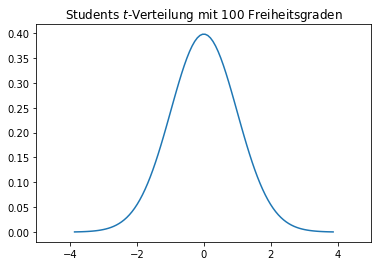

In [8]:
from scipy import stats

rv = stats.t(df=100, loc=0, scale=1)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
y = rv.pdf(x) 

fig, ax = plt.subplots()
ax.set_title("Students $t$-Verteilung mit 100 Freiheitsgraden")
ax.set_xlim(-5, 5)
ax.plot(x, y)
plt.show()

Diese Verteilung sieht auf den ersten Blick aus wie eine Normalverteilung. Die $t$-Verteilung hat jedoch eine etwas breitere Glocke als die Normalverteilung, die Fläche ist als in den Randbereichen größer. Diese Ähnlichkeit zur Normalverteilung ist kein Zufall. Die $t$-Verteilung ist definiert als die erwartete Abweichung des Mittelwerts von 0 bei einer Stichprobe , die aus der Standardnormalverteilung mit Mittelwert 0 und Standardabweichung 1 gezogen wurden. Die $t$-Verteilung sagt also etwas über die Unsicherheit der Mittelwerts einer Stichprobe aus. Diese Unsicherheit können wir natürlich auch für zwei Stichproben bestimmen, was dann schon sehr ähnlich zu unserer Hypothese ist. 

Der Unterschied ist, das die $t$-Verteilung die Unsicherheit für eine Mittelwert von 0 und eine Standardabweichung von 1 berechnet, wir haber mit unsere Hypothese beliebige Normalverteilungen zulassen. Daher benötigen wir die Teststatistik. Diese ist für den $t$-Test definiert als

$$t = \frac{mean(X_1)-mean(X_2)}{\sqrt{\frac{sd(X_1)^2}{n_1}+\frac{sd(X_2)^2}{n_2}}}.$$

Diese Gleichung sieht zwar kompliziert aus, ist aber - etwas vereinfacht - nichts anderes als eine Standardisierung der Stichproben, so dass sich die Differenz der Mittelwerte wie bei zwei Standardnormalverteilungen verhält. Daher können wir die $t$-Verteilung benutzen, um auszurechnen wie Wahrscheinlich es ist, dass wir diese Abweichung sehen. Hierfür berechnet man die Fläche unter der $t$-Verteilung außerhalb von $\pm t$. 

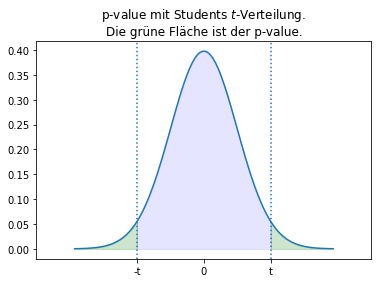

In [7]:
tvalue = 2
xfill = np.linspace(-tvalue, tvalue)
xfill_left = np.linspace(rv.ppf(0.0001),-tvalue)
xfill_right = np.linspace(rv.ppf(0.9999),tvalue)

plt.figure()
plt.title("p-value mit Students $t$-Verteilung.\nDie grüne Fläche ist der p-value.")
plt.axvline(tvalue, linestyle=':')
plt.axvline(-tvalue, linestyle=':')
plt.xlim(-5,5)
plt.xticks([-tvalue,0,tvalue], ['-t','0','t'])
plt.plot(x,y)
plt.fill_between(xfill, rv.pdf(xfill), y2=0, alpha=0.1, color='b')
plt.fill_between(xfill_left, rv.pdf(xfill_left), y2=0, alpha=0.2, color='g')
plt.fill_between(xfill_right, rv.pdf(xfill_right), y2=0, alpha=0.2, color='g')
plt.show()

Die grüne Fläche ist die Wahrscheinlichkeit, dass die Stichprobe einer Standardnormalverteilung um mindestens $t$ von 0 abweicht. Da wir $t$ so berechnen, dass es genau die Abweichung der Mittelwerte voneinander darstellt, entspricht dies der Wahrscheinlichkeit das die zwei Stichproben gezogen wurden, wenn doe Populationen normalverteilt sind und den gleichen Mittelwert haben. Das ist der p-value des $t$-Tests, also die Wahrscheinlichkeit der Daten, wenn unsere Hypothese zutrifft. 

### Das Signifikanzniveau

Der p-value gibt also an, wie wahrscheinlich es ist, die Daten zu sehen. Es ist also nur logisch, dass ein kleiner p-value darauf hindeutet, dass die Null Hypothese nicht zutrifft und verworfen werden sollte. Diese Folgerung wird durch das *Signifikanzniveau* $\alpha$ formalisiert um die *statistische Signifikanz* des Testergebnisse zu definieren. Das Signifikanzniveau ist definiert als die Wahrscheinlichkeit, dass die Null Hypothese verworfen wird, obwohl sie zutrifft. Häufig wird ein Signifikanzniveau von 0,05 oder in letzter Zeit auch 0,005 verwendet. Mit dem Signifikanzniveau können wir jetzt basierend auf dem p-value entscheiden, ob wir die Null Hypothese verwerfen: 

- Wenn der $p$-$value > \alpha$ können wir die Null Hypothese nicht verwerfen. Das heißt, dass die Stichproben nicht unwahrscheinlich sind, wenn die Null Hypothese wahr ist. 
- Wenn der $p$-$value \leq \alpha$ verwerfen wir die Null Hypothese und haben ein *statistisch signifikantes Ergebnis*. Die Stichproben sind also sehr unwahrscheinlich, wenn die Null Hypothese wahr ist. 

Bitte beachten Sie, dass man mit Hypothesentests keine absolute Sicherheit hat, sondern die Ergebnisse nur mit einer durch das Signifikanzniveau festgelegten Wahrscheinlichkeit stimmen. Das heißt auch, dass wenn wir die Null Hypothese verwerfen, sie trotzdem wahr sein könnte. Es ist nur unwahrscheinlich - aber nicht unmöglich! - das diese Daten vorkommen. Deshalb verwenden wir auch die etwas komplizierten Formulierungen *nicht verwerfen können*, bzw. *verwerfen* bezogen auf ein Signifikanzniveau. 

### Wichtige Hypothesentests

Was wir oben im Detail für den $t$-Test erklärt haben, gilt für alle statistischen Tests: Es gibt eine Nullhypothese in der wir Annahmen treffen. Dann berechnen wir den $p$-value also die Wahrscheinlichkeit der Daten, gegeben den Annahmen. Basierend auf dem $p$-value können wir bestimmen ob wir die Null Hypothese mit einem gewissen Signifikanzniveau verwerfen. Es gibt sehr viele derartige statistische Tests. Hier sind die Null Hypothesen einiger sehr wichtiger Tests: 

- Welchs $t$-Test: Die Mittelwerte zweier unabhängiger normalverteilter Populationen sind gleich. 
- Mann-Whitney-U Test / Wilcoxon-Ranksum-Test: Die Werte einer Population dominieren die Werte einer anderen Population nicht (entspricht in etwa der Frage ob die Median gleich sein). 
- Shapiro-Wilk-Test: Die Population einer Stichprobe mit einer Größe zwischen 3 und 5.000 ist normalverteilt. 
- Levene's Test: Die Varianz von einer Gruppe von Populationen ist gleich. 
- ANOVA (F-Test): Die Mittelwerte einer Gruppe von normalverteilten Populationen mit gleichen Varianzen sind gleich. 
- Kolmogorov-Smirnoff Test: Zwei Populationen haben die gleichen Wahrscheinlichkeitsverteilung. 

Wir wissen bereits, das wir Welchs $t$-Test benutzen können um die Mittelwerte von Normalverteilungen zu vergleichen. Wenn die Daten nicht Normalverteilt sind, kann man stattdessen den Mann-Whitney-U test nutzen. Mit Hilfe des Shapiro-Wilk Tests kann man ebstimmen, ob eine Stichprobe normalverteilt ist. Wenn man mehr als zwei Datensätze vergleichen möchte, spricht man von einer Gruppe von Populationen. Mit ANOVA kann man bestimmen, ob die Mittelwerte aller dieser Populationen gleich sind, sofern es sich um Normalverteilungen mit der gleichen Varianz handelt. Die Normalverteilung können wir mit dem Shapiro-Wilk Test überprüfen, für die Varianzen können wir Levene's Test verwenden. 

Ähnlich wie bei den deskriptiven Statistiken (siehe [Kapitel 3](kapitel_03), gibt es *parametrische* und *nicht paramtrische* statistische Tests. Die parametrischen Tests haben Annahmen an die Daten (z.B. Normalverteilung), die nicht-parametrischen Tests machen keine derartigen Annahmen. Welchs $t$-Test ist zum Beispiel parametrisch und der Mann-Whitney-U Test ist das nicht parametrische Gegenstück. 

Der Kolmogorov-Smirnoff Test ist eine der generischsten statistischen Tests, da er beliebige Populationen mit kontinuierlichen Verteilungen miteinander vergleichen kann. Es gibt also nur wenige Einschränkungen, wann man den Test benutzen kann. Dennoch sollte man ihn als "letztes Mittel" sehen, mit dem man zumindest sagen kann, ob es irgendwelche unterschiede gibt. Was genau unterschiedlich ist, zum Beispiel die Lage, die Variabilität oder die Art der Verteilung, ist unklar. Als Vergleich: Wenn man mit dem Shapiro-Wilk Test bestimmt das die Populationen normalverteilt sind und mit Welchs $t$-Test eine signifikanten Unterschied der Mittelwerte feststellt, weiß man sehr genau, wie sich die Populationen voneinander unterscheiden. 

### Anwendung der Tests

Mit den jetzt bekannten Wissen über die statistischen Tests, können wir die Fragen vom Anfang des Kapitels beantworten: Sind die Mittelwerte der blauen und orangen Populationen unterschiedlich? Mit Hilfe der Hypothesentests können wir hierzu eine Aussage treffen, die mit hoher Wahrscheinlichkeit richtig ist. Hierzu müssen wir ein Signifikanzniveau $\alpha$ festlegen. Anschließend können wir den Shapiro-Wilk Test auf beide Stichproben anwenden um zu bestimmen ob die Populationen normalverteilt sind. Wenn dies der Fall ist, können wir die Mittelwerte mit Welch's $t$-Test Vergleichen, ansonsten nehmen wir den Mann-Whitney-U Test. 

In [12]:
from textwrap import TextWrapper

wrapper = TextWrapper(width=65)
def wrap_print(string):
    print('\n'.join(wrapper.wrap(string)))


alpha = 0.05
pval_shapiro1 = stats.shapiro(s1)[1]
pval_shapiro2 = stats.shapiro(s2)[1]

wrap_print('p-value des Shapiro-Wilk Test für die "blauen" Daten: %.4f' % pval_shapiro1)
if pval_shapiro1>alpha:
    wrap_print('Der Test hat ermittelt dass die Daten normalverteilt sind und wir können die Null Hypothese nicht mit einem Signifikanzniveau von alpha=%.3f verwerfen.' % alpha)
else:
    wrap_print('Der Test hat ermittelt das die Daten nicht normalverteilt sind und wir verwerfen die Null Hypothese mit einem Signifikanzniveau von alpha=%.3f.' % alpha)

print()
print('p-value des Shapiro-Wilk Test für die "orangen" Daten: %.4f' % pval_shapiro2)
if pval_shapiro1>alpha:
    wrap_print('Der Test hat ermittelt dass die Daten normalverteilt sind und wir können die Null Hypothese nicht mit einem Signifikanzniveau von alpha=%.3f verwerfen.' % alpha)
else:
    wrap_print('Der Test hat ermittelt das die Daten nicht normalverteilt sind und wir verwerfen die Null Hypothese mit einem Signifikanzniveau von alpha=%.3f.' % alpha)
print()

if pval_shapiro1>alpha and pval_shapiro2>alpha:
    wrap_print("Beide Populationen sind normalverteilt. Wir benutzen Welch's t-Test.")
    pval_equal = stats.ttest_ind(s1,s2,equal_var=False)[1]
    print()    
    wrap_print("p-value von Welch's t-Test: %f" % pval_equal)
    if pval_equal>alpha:
        wrap_print('Der Test hat ermittelt, dass die Mittelwerte wahrscheinlich gleich sind und wir können die Null Hypothese nicht mit einem Signifikanzniveau von alpha=%.3f verwerfen.' % alpha)
    else:
        wrap_print('Der Test hat ermittelt, dass die Mittelwerte wahrscheinlich nicht gleich sind und wir verwerfen die Null Hypothese mit einem Signifikanzniveau von alpha=%.3f.' % alpha)
else:
    wrap_print("Mindestens eine Population ist nicht normalverteilt. Wir benutzen den Mann-Whitney-U Test.")
    pval_equal = stats.mannwhitneyu(s1,s2,alternative='two-sided')[1]
    wrap_print("p-value des Mann-Whitney-U Tests: %f" % pval_equal)
    if pval_equal>alpha:
        wrap_print('Der Test hat ermittelt, dass die Populationen sich nicht dominieren wir können die Null Hypothese nicht mit einem Signifikanzniveau von alpha=%.3f verwerfen.' % alpha)
    else:
        wrap_print('Der Test hat ermittelt, dass eine Population die andere dominiert und wir verwerfen die Null Hypothese mit einem Signifikanzniveau von alpha=%.3f.' % alpha)

p-value des Shapiro-Wilk Test für die "blauen" Daten: 0.8290
Der Test hat ermittelt dass die Daten normalverteilt sind und wir
können die Null Hypothese nicht mit einem Signifikanzniveau von
alpha=0.050 verwerfen.

p-value des Shapiro-Wilk Test für die "orangen" Daten: 0.2498
Der Test hat ermittelt dass die Daten normalverteilt sind und wir
können die Null Hypothese nicht mit einem Signifikanzniveau von
alpha=0.050 verwerfen.

Beide Populationen sind normalverteilt. Wir benutzen Welch's
t-Test.

p-value von Welch's t-Test: 0.000102
Der Test hat ermittelt, dass die Mittelwerte wahrscheinlich nicht
gleich sind und wir verwerfen die Null Hypothese mit einem
Signifikanzniveau von alpha=0.050.


Die Tests haben also bestimmt, dass die Daten wahrscheinlich Normalverteilt sind, aber die Mittelwerte nicht gleich. Wir haben also eine statistisch signifikanten Unterschied zwischen den blauen und den orangen Daten mit einem Signifikanzniveau von $\alpha=0.05$. 

### Übliche Fehler bei Hypothesen Tests

Bei Hypothesen Tests steckt der Teufel im Detail, da es viele Aspekte gibt die man vergessen oder ungenau darstellen kann, was dazu führen kann das man die Ergebnisse überinterpretiert. Daher wollen wir hier einige größere und häufig vorkommende Fehler nennen, damit wir diese vermeiden können. 

Das größte Problem ist das man Hypothesen Tests nutzt, um binäre Aussagen zu machen, zum Beispiel "die Daten sind Normalverteilt" statt "der statischtische Test indiziert das die Daten mit hoher Wahrscheinlichkeit normalverteilt sind". Der große Unterschied: Die korrekte Aussage beinhaltet, dass es eine gewisse Unsicherheit über das Ergebnis gibt, was bei der absoluten Aussage nicht der Fall ist. Das derartige Fehler (häufig!) passieren, ist verständlich. Das korrekte Formulieren von statistischen Ergebnissen ist schwierig und die Sätze klingen oft umständlich, was dazu verleitet lieber eine deutlich einfachere absolute Formulierung zu benutzen.

Ein weiteres Problem ist das p-values häufig falsch benutzt werden. Dies liegt daran, das die Definition vom p-value als die Wahrscheinlichkeit die Daten gegeben der Annahmen zu beobachten relativ komplex ist. Aus diesem Grund gibt es auch viele Forscher, die gerne Hypothesen Tests komplett abschaffen und durch andere Verfahren (Bayesian Statistics) ersetzen würden. Es gibt aber auch sehr viele Forscher, die das Problem in der falschen Verwendung der p-values sehen, so dass lediglich eine bessere Statistikausbildung erforderlich ist. In diesem Sinne betrachten wir hier auch die zwei größten Probleme der p-values: *Scoring* und *p-Hacking*. 

Scoring bedeutet, dass der p-value als Punktzahl interpretiert wird und dann unterschiede Anhand ihrer p-values sortiert werden. Dies macht jedoch keinen Sinn, da die p-values eben nicht die Wahrscheinlichkeit, dass eine Hypothese korrekt ist messer, sondern nur das die Daten zur Annahme passen. Eine Sortierung nach wäre also stattdessen eine Art von Bewertung der Daten selbst, was nicht gewollt ist. 

Das p-Hacking passiert oft unbewusst. Auch hier liegt das Problem dadran, dass die p-values die Wahrscheinlichkeit sind, dass die Daten gegeben der Annahmen generiert werden. Ein p-value von 0,05 bedeutet also, dass es eine 5% Wahrscheinlichkeit gibt das diese Daten generiert werden, gegeben das die Null Hypothese zutrifft. Mit anderen Worten, es wird vom Test sogar erwartet, dass es eine gewisse Anzahl von *falsch positiven Testergebnisse* gibt, also das wir die Null Hypothese verwerfen, obwohl diese zutrifft. Dies ist im Allgemeinen kein Problem, solang die Wahrscheinlichkeit hierfür niedrig ist. Wenn man jedoch 20 Tests durchführt und jeder Test mit 5% Wahrscheinlichkeit falsch positiv ist, ist es fast sicher das es ein falsch positives Ergebnis gibt. Diesem Effekt kann man entgegenwirken, in dem man einen höheres Signifikanzniveau verlangt, was bedeutet das der p-value zum verwerfen der Hypothesen kleiner sein muss, wodurch man die Wahrscheinlichkeit von falsch positiven Ergebnissen reduziert. Man spricht hierbei auch vom *p-value adjustment*, zum Beispiel durch Bonferonni Korrektur [^bonferroni]. Derartiges p-Hacking ist oft keine Absicht, sondern passiert durch die Analyse von Teilgruppen. Um zum Beispiel vom Alter der Einwohner zurück zu kommen: Auch wenn Berlin und Hamburg das gleiche Durchschnittsalter hätten, würde man sehr sicher Stadtteile finden, wo die Abweichung größer wäre und der Unterschied dadurch signifikant. Ein berühmtes Beispiel dafür ist dieser medizinische Fachartikel [^phacking]: Die Autoren wurden von den Editoren gezwungen Teilgruppen zu analysieren und haben um zu demonstrieren, dass dies zu falsch positiven Ergebnissen führt auch eine Analyse der Auswirkungen der Sternzeichen auf die Behandlung mit aufgenommen. 

## Effektstärke

Die Signifikanz von Ergebnissen bedeutet nicht immer, dass ein Unterschied auch eine Bedeutung hat. Für unsere blauen und orangenen Daten haben wir folgende Mittelwerte und Standardabweichungen. 

[^bonferroni]: https://mathworld.wolfram.com/BonferroniCorrection.html
[^phacking]: https://doi.org/10.1016/S0140-6736%2888%2992833-4

In [15]:
print('mean("blue")   = %.2f' % np.mean(s1))
print('sd("blue")     = %.2f' % np.std(s1))
print('mean("orange") = %.2f' % np.mean(s2))
print('sd("orange")   = %.2f' % np.std(s2))

mean("blue")   = -0.01
sd("blue")     = 0.19
mean("orange") = 0.07
sd("orange")   = 0.20


Der Unterschied der Mittelwerte ist im Verhältnis zu Standardabweichung also sehr klein. Die *Effektstärke* erweitert das Konzept der Signifikanz mit einem Maß dafür, wie groß die Differenz ist. Für normalverteilte Daten kann die Effektstärke vom Unterschied der Mittelwerte durch Cohen's $d$, welche definiert ist als

$$d = \frac{mean(X_1)-mean(X_2)}{s}$$

mit

$$s = \sqrt{\frac{(n_1-1)\cdot sd(X_1)^2+(n_2-1)\cdot sd(X_2)^2}{n_1+n_2-2}}.$$

Der Wert $s$ definiert die *gepooled Standardabweichung* zweier Stichproben, definiert als das nach der Anzahl der Datenpunkte gewichtete Mittel der Standardabweichungen der Stichproben. Daher ist Cohens $d$ nichts anderes als das Verhältnis der Mittelwertdifferenz zur Standardabweichung und $d=1$ bedeutet, dass die Mittelwerte eine Standardabweichung voneinander entfernt liegen. Basierend von Cohen und Sawilowski kann man folgende Tabelle als zur Interpretation der Größenordnung der Effektstärke benutzen. 

| Cohens $d$               | Effektstärke                   |
|--------------------------|--------------------------------|
| $\vert d \vert < 0.01$   | Vernachlässigbar /  Negligible |
| $\vert d \vert \geq 0.01$| Sehr klein / Very small        |
| $\vert d \vert \geq 0.2$ | Klein / Small                  |
| $\vert d \vert \geq 0.5$ | Mittel / Medium                |
| $\vert d \vert \geq 0.8$ | Groß / Large                   |
| $\vert d \vert \geq 1.2$ | Sehr groß / Very large         |
| $\vert d \vert \geq 2.0$ | Riesig / Huge                  |

Diese Tabelle wurde zwar für die Sozialwissenschaften erstellt, wird jedoch nichtsdestotrotz sehr häufig auch in anderen Domänen verwendet. In unserem Beispiel haben wir folgende Effektstärke. 

In [18]:
from statistics import mean, stdev
from math import sqrt

s = sqrt( ((len(s1)-1)*stdev(s1)**2 + (len(s2)-1)*stdev(s2)**2)/(len(s1)+len(s2)-2))
cohens_d = (mean(s1) - mean(s2)) / s

if abs(cohens_d)<0.01:
    effsizestr = "vernachlässigbarre"
elif abs(cohens_d)<0.2:
    effsizestr = "sehr kleiner"
elif abs(cohens_d)<0.5:
    effsizestr = "kleiner"
elif abs(cohens_d)<0.8:
    effsizestr = "mittelerer"
elif abs(cohens_d)<1.2:
    effsizestr = "großer"
elif abs(cohens_d)<2:
    effsizestr = "sehr großer"
else:
    effsizestr = "riesiger"

print("Effektstärke (Cohens d): %.3f - %s Effekt" % (cohens_d, effsizestr))

Effektstärke (Cohens d): -0.393 - kleiner Effekt


Es gibt also einen kleine Effekt. Das passt auch zu dem,w as wir im Histogram gesehen haben: Es gibt zwar einen Unterschied zwischen den Stichproben, der ist aber klein, wie wir jetzt mit Hilfe von Cohens $d$ bestätigt haben. 

## Konfidenzintervalle

Wenn man den Mittelwert anhand einer Stichprobe schätzt, ist es naheliegend zu fragen wie gut diese Schätzung ist. Das hängt von zwei Faktoren ab: Der größe der Stichprobe und der Variabilität der Daten. Dies merk man schnell an einem Beispiel: Angenommen sie wollen das Durchschnittsalter ihrer Kunden bestimmen. Das die Schätzung besser wird, je mehr Kunden man befragt, ist offensichtlich. Wenn die ersten Kunden alle mit Zahlen zwischen 18 und 25 Antworten, haben sie eine kleine Variabilität der Antworten und können den Wert schon gut eingrenzen. Wenn die ersten Kunden jedoch Zahlen zwischen 18 und 86 nennen, haben sie eine größere Unsicherheit und müssen mehr Kunden befragen, um zu einem guten Schätzwert zu kommen. 

Dies ist zum Beispiel auch für die Bewertung von Klassifikationsmodellen relevant. Angenommen wir haben ein Klassifikationsmodell für die Abwanderung von Kunden, welches auf den Daten von fünf Filialien trainiert wird und mit 15 Filialien ausgewertet wird. Es gibt dann 15 Schätzwerte für die Güte dieses Modells. Als fiktive Ergebnisse nehmen wir an, das die Accuracy normalverteilt mit einem Mittelwert von 0,83 und einer Standardabweichung von 0,13 ist. Für die weitere Anwendung ist folgende Frage sehr wichtig: Welchen Mittelwert erwarten wir, wenn wir das Modell bei 15 weiteren Filialen anwenden?

Dies kann man mit Hilfe von *Konfidenzintervallen* berechnen. Ein $C\%$ Konfidenzintervall $\theta$ für einen Parameter $p$ ist ein Interval, in dem $p$ mit $C\%$ Wahrscheinlichkeit liegt. Konfidenzintervalle kann man für beliebige stastische Merkmale $p$ berechnen, auch wenn sie meistens für den Mittelwert berechnet werden. Der wahre Wert von $p$ liegt dann mit hoher Wahrscheinlich, nämlich $C\%$, in diesem Interval. Die Wahrscheinlichkeit $C$ nennt man das Konfidenzniveau. Für ein Konfidenzniveau von $C=0,95$, haben wir also eine 95% Chance, das der Mittelwert von weiteren Stichproben im Konfidenzinterval liegt. 

Für die Stichprobe $X = \{x_1, ..., x_n\}$ einer normalverteilten Population kann man das Konfidenzinterval für den Mittelwert berechnen als 

$$\theta = [mean(X) - z_C\frac{sd(X)}{\sqrt{n}},  mean(X) + z_C\frac{sd(X)}{\sqrt{n}}], $$

wobei $z_C$ der sogenannte *z-value* des Konfidenzniveaus ist. Die Formel passt zur Intuition: Das Konfidenzinterval wird kleiner, wenn die Stichprobe größer oder die Standardabweichung kleiner ist. In der Praxis, liest man den Wert $z_C$ einfach aus einer Tabelle ab. 

| $C$   | $z_C$ |
|-------|-------|
| 90%   | 1,645 |
| 95%   | 1,96  |
| 99%   | 2,58  |
| 99,5% | 2,807 |
| 99,9% | 3,291 |

In dieser Tabelle stehen die z-values der Standardnormalverteilung. Der z-value ist so gewählt, dass die Fläche unter der Dichtefunktion der Normalverteilung $C$ entspricht. 

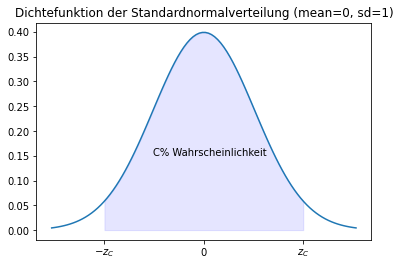

In [21]:
from math import sqrt
from scipy.stats import norm

mu = 0
sigma = 1
zc = 1.96
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)
xfill = np.linspace(-zc, zc)

fix, ax = plt.subplots()
ax.set_title("Dichtefunktion der Standardnormalverteilung (mean=0, sd=1)")
ax.fill_between(xfill, norm.pdf(xfill), y2=0, alpha=0.1, color='b')
ax.set_xticks([-zc,0,zc])
ax.set_xticklabels(['$-z_C$','0','$z_C$'])
ax.plot(x,y)
ax.text(-1, 0.15, "C% Wahrscheinlichkeit")
plt.show()

In unseren Beispiel bekommen wir für verschiedene Konfidenzlevel die folgenden Konfidenzintervalle. 

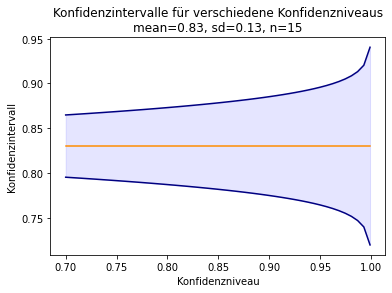

In [22]:
mymu = 0.83
mysd = 0.13
myn = 15

x = np.linspace(0.7, 0.999)
y_upper = 0.83+norm.ppf((1-x)/2)*mysd/sqrt(myn)
y_lower = 0.83-norm.ppf((1-x)/2)*mysd/sqrt(myn)
fig, ax = plt.subplots()
ax.plot()
ax.plot(x,y_upper, color='navy')
ax.plot(x,y_lower, color='navy')
ax.plot([0.7,0.999],[0.83,0.83], color='darkorange')
ax.fill_between(x, y_upper, y2=y_lower, alpha=0.1, color='b')
ax.set_title('Konfidenzintervalle für verschiedene Konfidenzniveaus\nmean=0.83, sd=0.13, n=15')
ax.set_xlabel('Konfidenzniveau')
ax.set_ylabel('Konfidenzintervall')
plt.show()

Ähnlich wie bei p-value, wird auch das Konfidenzintervall häufig falsch interpretiert. Hier sind einige korrekte Interpretation eines $C\%$ Konfidenzintervals. 

- Es gibt eine $C\%$ Chance, dass der gemessene Wert (zum Beispiel Mittelwert) bei zukünftigen Wiederholungen des gleichen Experiments in das Intervall $\theta$ fällt.
- Es gibt keinen statistisch signifikanten Unterschied zwischen dem geschätzten Wert und allen Werten in $\theta$ mit einem Signifikanzniveau von $1-C\%$.
- Es gibt eine $1-C\%$ Wahrscheinlichkeit der Stichprobe, wenn der wahre Wert außerhalb des Intervalls $\theta$ liegt. 

Übliche falsche Interpretationen des Konfidenzintervalls sind zum Beispiel: 

- Der wahre Wert von $p$ leigt mit $C\%$ Wahrscheinlichkeit in $\theta$. Ähnlich wie beim p-value bei Hypothesen Tests, liefern Konfidenzintervalle nur eine Aussage über die Wahrscheinlichkeit bei Stichproben. 
- $C\%$ der beobachteten Daten liegen innerhalb von $\theta$. Hier wird das Konfidenzinterval mit den Quantilen verwechselt. 

## Gute Beschreibung von Ergebnissen

In der Wissenschaft, aber auch in der Praxis, wird häufig nur geguckt ob es unterschiede gibt und, gerade in der Wissenschaft, noch ob diese signifikant sind. Eine saubere statistische Bewertung von Projektergebnissen sollte aber darüber hinaus gehen und zum Beispiel auch die Effektstärke und die Konfidenzintervalle beinhalten. Außerdem sollte man die statistische Auswertung zu Beginn eines Projekts planen. Andernfalls riskiert man das oben beschriebene p-Hacking, in dem man Experimente immer weiter anpasst, bis man ein gewünschtes Ergebnis gefunden hat. In der Wissenschaft für dies zur Registrierung von Studien, wo das Protokol bereits vor der Durchführung festgelegt wird. Diese vorgehen hat sich bereits bei klinischen Studien in der medizin bewährt und vermeidet falsch positive Ergebnisse. 

In diesem Kapitel haben wir uns nur mit der häufigkeitsbasierten Statistik beschäftig. Es gibt auch noch einen anderen Ansatz, die Bayesian Stastitik die im Kern auf dem Satz von Bayes (siehe [Kapitel 7](kapitel_07)) basiert. Hier wird direkt geschätzt, wie wahrscheinlich es ist, das eine Hypothese war ist. Dies hat den Vorteil, das die Ergebnisse einfacher zu interpretieren sind. Die Theorie und Anwendung ist hier jedoch etwas komplexer, weshalb die häufigkeitsbasierte Statistik weiterhin bei vielen Analysen das Mittel der Wahl ist. 